In [113]:
%matplotlib inline

import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib.cm import get_cmap

cmap = get_cmap('Spectral')  # You can choose any sequential colormap here

In [116]:
bb = ["../Files/Aligned/Yields_Merge_AlignedDistv2.h5", "../Files/Shifted/Yields_Merge_ShiftedDistv2.h5", "../Files/Rotated/Yields_Merge_Rot30Distv2.h5" ]

kr = ["../Files/Aligned/Yields_Merge_AlignedDistv2Kr.h5", "../Files/Shifted/Yields_Merge_ShiftedDistv2Kr.h5", "../Files/Rotated/Yields_Merge_Rot30Distv2Kr.h5" ]


names = ["Aligned", "Shifted", "Rotated"]

cols = [cmap(0.75), cmap(0.25), cmap(0)]

bb_df = []
kr_df = []

bb_yields = []
kr_yields = []

for index, f in enumerate(bb):
    bb_df.append(pd.read_hdf(f))
    bb_yields.append(bb_df[index].Yield.values)

for index, f in enumerate(kr):    
    kr_df.append(pd.read_hdf(f))
    kr_yields.append(kr_df[index].Yield.values)


# Fit the distribution 
def Gaussian_(x, A, mu, sigma):
    return A * np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))

[4.03696540e+00 7.36324896e-05 9.88755339e-02]
[ 5.42078232e+00 -7.25360677e-05  7.35088110e-02]
[2.27949475e+00 9.27992728e-05 1.70620996e-01]


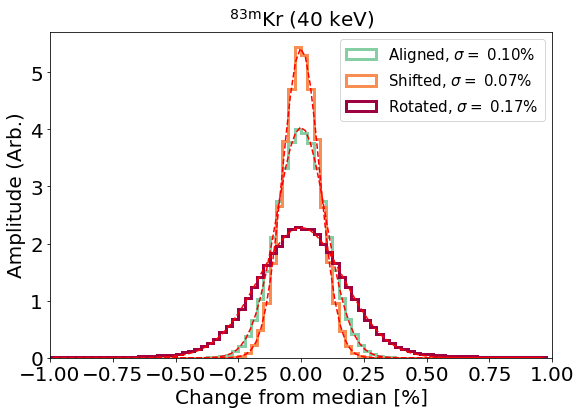

In [190]:
# Get the medians and shift
scale    = 1e6
binscale = 0.01

plt.figure(figsize=(9,6))

amplitudes = []
means = []
sigmas = []

for index, Y in enumerate(kr_yields):
    counts, xbins, _ = plt.hist(100*((Y-np.median(Y))/np.median(Y) ), bins = np.arange(-1,1,0.025), histtype = "step", density = True, label = names[index], linewidth = 3, color = cols[index]);
    bin_centers = xbins+ (xbins[1]-xbins[0])/2.0
    bin_centers = bin_centers[:-1]
    popt, pcov = curve_fit(Gaussian_, bin_centers, counts, bounds  = ( [0 , -1, 0], [10, 1, np.inf]), maxfev=50000)
    print(popt)
    amplitudes.append(popt[0])
    means.append(popt[1])
    sigmas.append(popt[2])
    # plt.plot(np.linspace(min(bin_centers), max(bin_centers), 100), Gaussian_(np.linspace(min(bin_centers), max(bin_centers), 100), *popt), 'r--') # label='sigma=%5.2f' % sigma


legend = plt.legend(fontsize=15)
legend = plt.gca().get_legend().remove()

new_labels = [ f"{names[0]}, $\sigma = $ {sigmas[0]:.2f}%", f"{names[1]}, $\sigma = $ {sigmas[1]:.2f}%", f"{names[2]}, $\sigma = $ {sigmas[2]:.2f}%"]
plt.legend(new_labels, fontsize=15)

plt.plot(np.linspace(min(bin_centers), max(bin_centers), 100), Gaussian_(np.linspace(min(bin_centers), max(bin_centers), 100), amplitudes[0], means[0], sigmas[0]), 'r--')
plt.plot(np.linspace(min(bin_centers), max(bin_centers), 100), Gaussian_(np.linspace(min(bin_centers), max(bin_centers), 100), amplitudes[1], means[1], sigmas[1]), 'r--')
plt.plot(np.linspace(min(bin_centers), max(bin_centers), 100), Gaussian_(np.linspace(min(bin_centers), max(bin_centers), 100), amplitudes[2], means[2], sigmas[2]), 'r--')


plt.title(r"$^{83\mathrm{m}}$Kr (40 keV)", fontsize = 20)
plt.xlabel("Change from median [%]", fontsize = 20)
plt.ylabel("Amplitude (Arb.)", fontsize = 20)
# plt.legend(fontsize = 15)
plt.xlim(-1, 1)
plt.tick_params(axis='both', labelsize=20)
plt.tick_params(axis='both', labelsize=20) 
plt.show()


[3.49084362e+01 4.67484569e-05 1.14182923e-02]
[5.03949171e+01 3.37473199e-05 7.91503239e-03]
[1.32012188e+01 1.44310177e-04 3.00823034e-02]


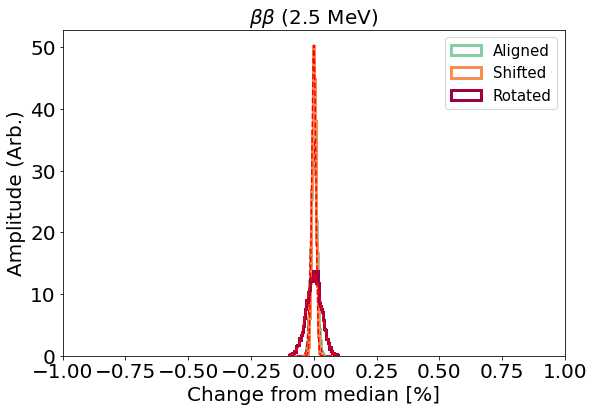

In [177]:
# Get the medians and shift
scale    = 1e6
binscale = 0.01

plt.figure(figsize=(9,6))

amplitudes = []
means = []
sigmas = []

for index, Y in enumerate(bb_yields):
    counts, xbins, _ = plt.hist(100*((Y-np.median(Y))/np.median(Y) ), bins = np.arange(-0.1,0.1,0.0025), histtype = "step", density = True, label = names[index], linewidth = 3, color = cols[index]);
    bin_centers = xbins+ (xbins[1]-xbins[0])/2.0
    bin_centers = bin_centers[:-1]
    popt, pcov = curve_fit(Gaussian_, bin_centers, counts, bounds  = ( [0 , -1, 0], [100, 1, np.inf]), maxfev=50000)
    print(popt)
    sigmas.append(popt[2])
    # plt.plot(np.linspace(min(bin_centers), max(bin_centers), 100), Gaussian_(np.linspace(min(bin_centers), max(bin_centers), 100), *popt), 'r--') # label='sigma=%5.2f' % sigma


legend = plt.legend(fontsize=15)
legend = plt.gca().get_legend().remove()

new_labels = [ f"{names[0]}, $\sigma = $ {sigmas[0]:.2f}%", f"{names[1]}, $\sigma = $ {sigmas[1]:.2f}%", f"{names[2]}, $\sigma = $ {sigmas[2]:.2f}%"]
plt.legend(new_labels, fontsize=15)

plt.plot(np.linspace(min(bin_centers), max(bin_centers), 100), Gaussian_(np.linspace(min(bin_centers), max(bin_centers), 100), amplitudes[0], means[0], sigmas[0]), 'r--')
plt.plot(np.linspace(min(bin_centers), max(bin_centers), 100), Gaussian_(np.linspace(min(bin_centers), max(bin_centers), 100), amplitudes[1], means[1], sigmas[1]), 'r--')
plt.plot(np.linspace(min(bin_centers), max(bin_centers), 100), Gaussian_(np.linspace(min(bin_centers), max(bin_centers), 100), amplitudes[2], means[2], sigmas[2]), 'r--')

plt.title(r"$\beta\beta$ (2.5 MeV)", fontsize = 20)
plt.xlabel("Change from median [%]", fontsize = 20)
plt.ylabel("Amplitude (Arb.)", fontsize = 20)
plt.legend(fontsize = 15)
plt.xlim(-1, 1)
plt.tick_params(axis='both', labelsize=20)
plt.tick_params(axis='both', labelsize=20) 
plt.show()